In [1]:
'''
    01 — Exploratory Data Analysis (EDA)
    Project: Customer Churn Prediction  
    Dataset: Telco Customer Churn (Kaggle)

    This notebook explores the dataset to understand:
    - Data structure  
    - Missing values  
    - Feature types  
    - Basic distributions  
    - Potential relationships with churn  

    The goal is to gain insights that guide feature engineering and modeling.
'''

from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
project_root = Path("../")
data_path = project_root / "data" / "raw" / "WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 26.5 % of customers churn
df['Churn'].value_counts(normalize=True)


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [ ]:
# No missing numeric data

df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Text(0.5, 1.0, 'Churn Distribution')

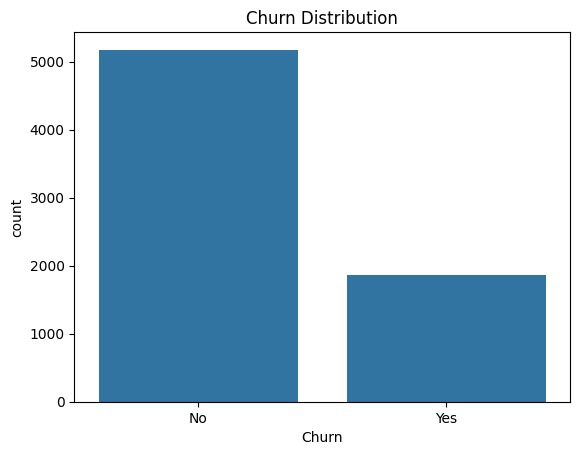

In [ ]:
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")

Text(0.5, 1.0, 'Churn by Contract Type')

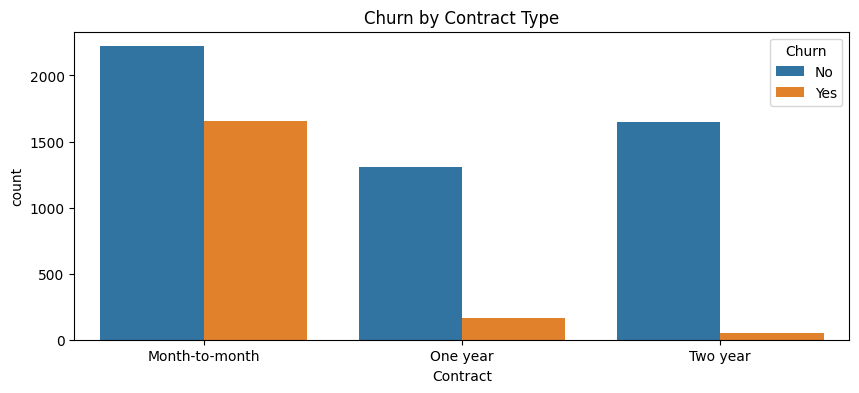

In [9]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")

Text(0.5, 1.0, 'Churn by Payment Method Type')

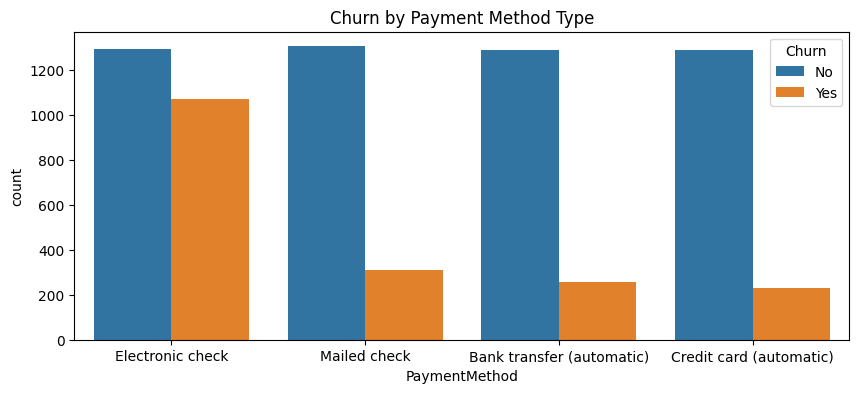

In [13]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("Churn by Payment Method Type")

Text(0.5, 1.0, 'InternetService')

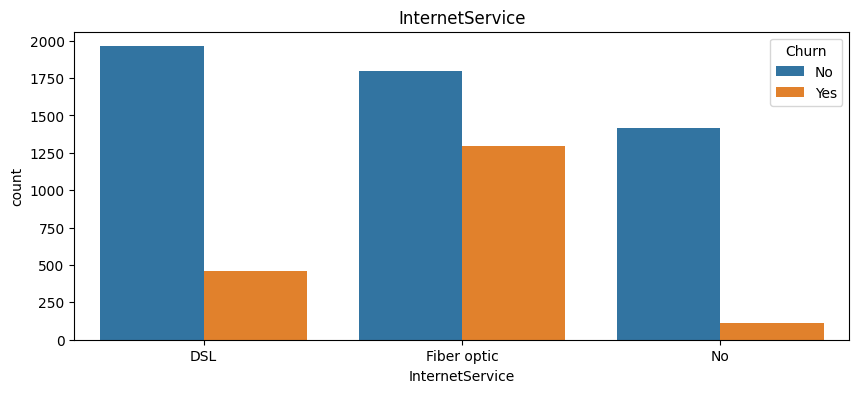

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Churn by Internet Service Type")

([<matplotlib.axis.XTick at 0x27187490800>,
 [Text(0, 0, 'Does not have a dependent'), Text(1, 0, 'Has a dependent')])

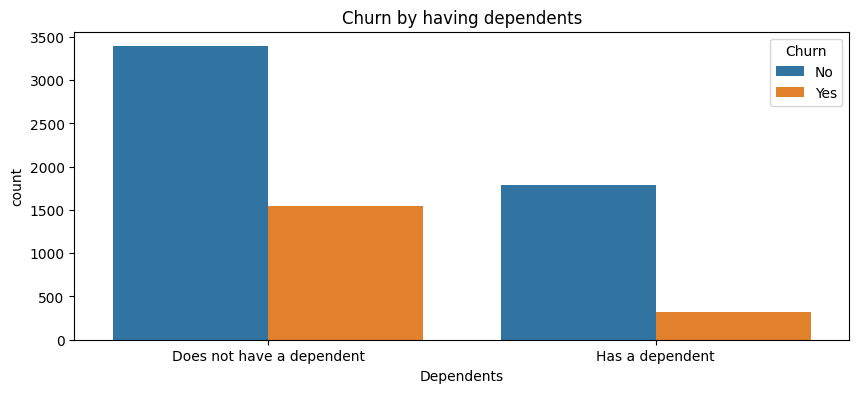

In [19]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title("Churn by having dependents")
plt.xticks([0, 1], ['Does not have a dependent', 'Has a dependent'])

([<matplotlib.axis.XTick at 0x27186dfd6a0>,
 [Text(0, 0, 'Not Senior'), Text(1, 0, 'Senior')])

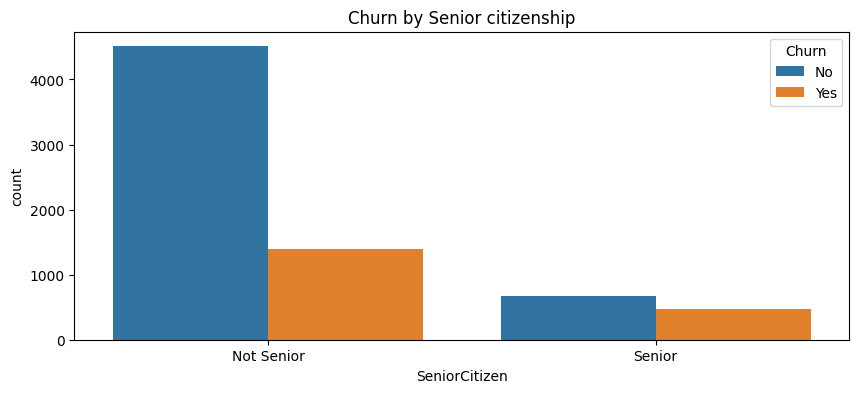

In [15]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title("Churn by Senior citizenship")
plt.xticks([0, 1], ['Not Senior', 'Senior'])

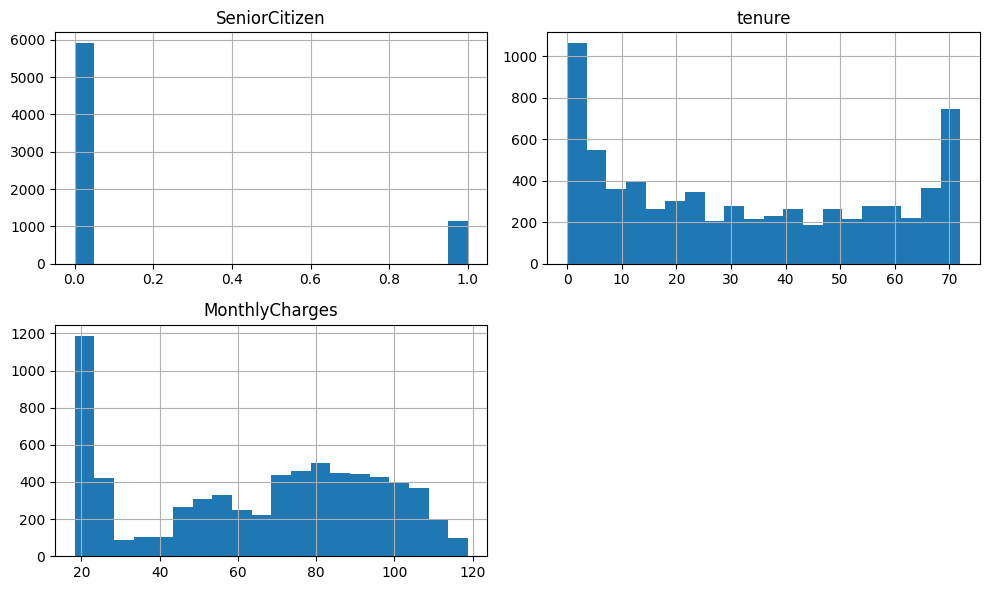

In [21]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols].hist(figsize=(10, 6), bins=20)
plt.tight_layout()


In [24]:
df.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
Yes,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


In [27]:
df.groupby('Churn')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [ ]:
# Key Insights

'''
- Churn rate is approximately 27 %.
- Contract type strongly influences churn (month-to-month contracts churn more).
- Electronic billing seems to increase churn rate.
- Senior citizens have a higher churn rate.
- Having a dependent increases churn rate.
- High monthly charges increase churn rate.
- Having being a customer for a long time (high tenure) decreases churn rate.
- Several categorical columns need encoding.

'''